<style>
  .rtl {
    direction: rtl;
    text-align: justify;
    line-height: 200%;
    font-family: "Vazir", sans-serif;
    color: #fff; /* white text */
  }
  .ltr {
    direction: ltr;
    unicode-bidi: isolate;
  }
  h2.rtl {
    color: #4cf7a4ff;
  }
  strong {
    color: #4cf7a4ff; /* light pink highlights */
  }
</style>

<h2 align = "right" class "rtl"><strong>
پیش بینی قیمت خانه های کالیفورنیا
</strong></h2>
<h3 align  = "right" class = "rtl">
‌<strong>هدف:‌</strong> استفاده و بهبود الگوریتم <span class = "ltr"> Linear Regression</span> برای پیش بینی 
</h3>
</p>
<ol dir="rtl" class="rtl" style="padding-right:1.25em">
  <li><strong><span class = "ltr">pandas</span>:</strong> انجام محاسبات کد.</li>
  <li><strong><span class = "ltr">matplotlib, seaborn</span>:</strong> رسم نمودار های کد.</li>
  <li><strong><span class = "ltr"> scikit learn</span>:</strong> آموزش و انتخاب مدل ها از این کتابخانه انجام میشود. همچنین دیتاست مورد نظر را هم از این کتابخانه انتخاب میکنیم.</li>
  </ol>
</p>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import matplotlib.image as mpimg

<style>
  .rtl {
    direction: rtl;
    text-align: justify;
    line-height: 200%;
    font-family: "Vazir", sans-serif;
    color: #fff; /* white text */
  }
  .ltr {
    direction: ltr;
    unicode-bidi: isolate;
  }
  h2.rtl {
    color: #4cf7a4ff;
  }
  strong {
    color: #4cf7a4ff; /* light pink highlights */
  }
</style>
<h2 align = "right" class = "rtl">
<strong>
آماده سازی دیتاست
</strong>
</h2>
<p class = "rtl">
ابتدا دیتاست مورد نظر را فرا خوانی میکنیم. برای راحتی بیشتر در تحلیل دیتاست نیاز است ابتدا آن را به فرمت دیتافریم پانداز دربیاریم. برای این کار باید از کلاس <span class = "ltr"> Dataframe</span> استفاده کرده و با استفاده از دستور <span class = "ltr">.data</span> مقادیر سطر ها را میخوانیم. سپس با دستور <span class = "ltr"> feature_names</span> نام ستون ها را مشخص میکنیم.
</p>
<p class = "rtl">
بعد از ساخت دیتاست باید ستون های <span class = "ltr"> x </span> و <span class = "ltr"> y </span> را مشخص کنیم. ستون هدف ما <span class = "ltr"> MedHouseVal </span> خواهد بود. چراکه این ستون ارزش خانه ها نشان خواهد داد.
</p>
<p class = "rtl">
در نهایت با استفاده از دستور <span class = "ltr"><code> describe()</code></span> میتوان اطلاعات مریوط به این دیتاست نظیر چارک ها٫ مقادیر ماکسیمم و مینیمم٫ میانگین٫ تعداد دیتاها و میزان انحراف معیار هر ستون را فهمید.
</p>

In [3]:
data = fetch_california_housing()
# turning into dataframe
df = pd.DataFrame(data.data, columns= data.feature_names)


# Add the target column (house value)
df['MedHouseVal'] = data.target

# print(df.head(5)
# print(df.tail(5))
df.isna().sum()
describe1=df.describe()
describe1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<style>
  .rtl {
    direction: rtl;
    text-align: justify;
    line-height: 200%;
    font-family: "Vazir", sans-serif;
    color: #fff; /* white text */
  }
  .ltr {
    direction: ltr;
    unicode-bidi: isolate;
  }
  h2.rtl {
    color: #4cf7a4ff;
  }
  strong {
    color: #4cf7a4ff; /* light pink highlights */
  }
</style>

<p class = "rtl">
رسم نمودار هیستوگرام به ما کمک میکند تا توزیع دیتا ها را بهتر متوجه شویم. اگر دیتا ها توزیع مناسبی نداشته باشند٫ باید دیتا های  <span class = "ltr"> outlier</span>  را حدف کرد تا مدل ما دچار سردرگمی نشود. 
</p>
<p class = "rtl">
همانطور که می بینید٫ ستون های جمعیت٫ متوسط اتاق ها و اتاق خواب ها٫ درآمد متوسط و ستون <span class = "ltr"> AveOccup</span> دارای مقادیر <span class = "ltr"> outlier</span> هستند. در ادامه باید این مقادیر را از دیتاست حذف کنیم.
</p>

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

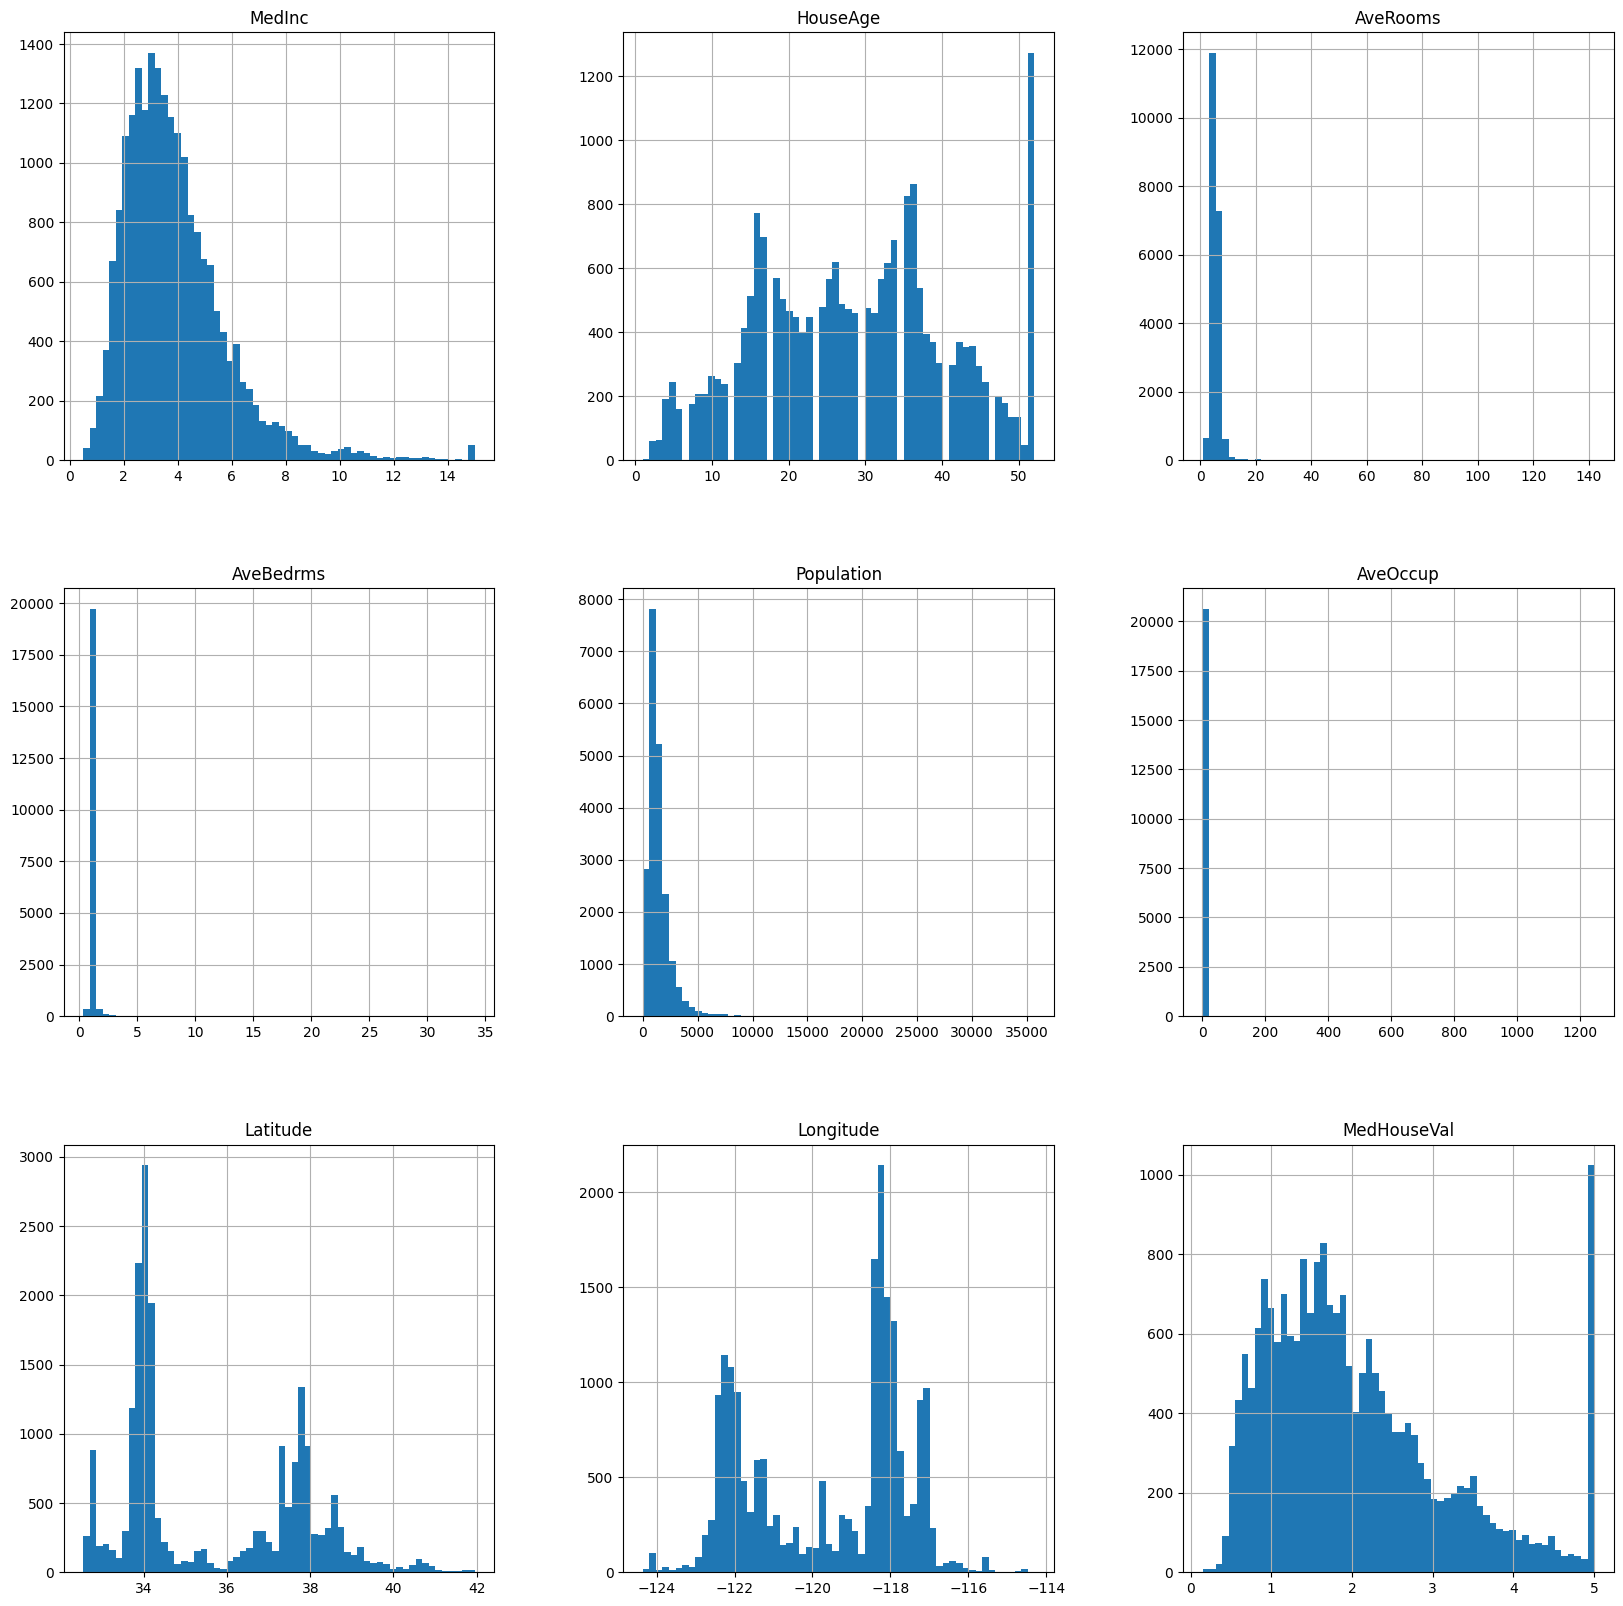

In [4]:
df.hist(bins = 60, figsize=(20,20))

<style>
  .rtl {
    direction: rtl;
    text-align: justify;
    line-height: 200%;
    font-family: "Vazir", sans-serif;
    color: #fff; /* white text */
  }
  .ltr {
    direction: ltr;
    unicode-bidi: isolate;
  }
  h2.rtl {
    color: #4cf7a4ff;
  }
  strong {
    color: #4cf7a4ff; /* light pink highlights */
  }
</style>
 <p class = "rtl">
در این قسمت با توجه به توضیع دیتا ها٫ مقادیر را طوری <span class = "ltr"> clip</span> میکنیم تا مقادیر <span class = "ltr"> outlier</span> از دیتا ها حدف شوند. بعد از انجام این کار و رسم دوباره نمودار هیستوگرام میبینیم که توزیع مقادیر ما نرمال تر از قبل شده.
 </p>

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

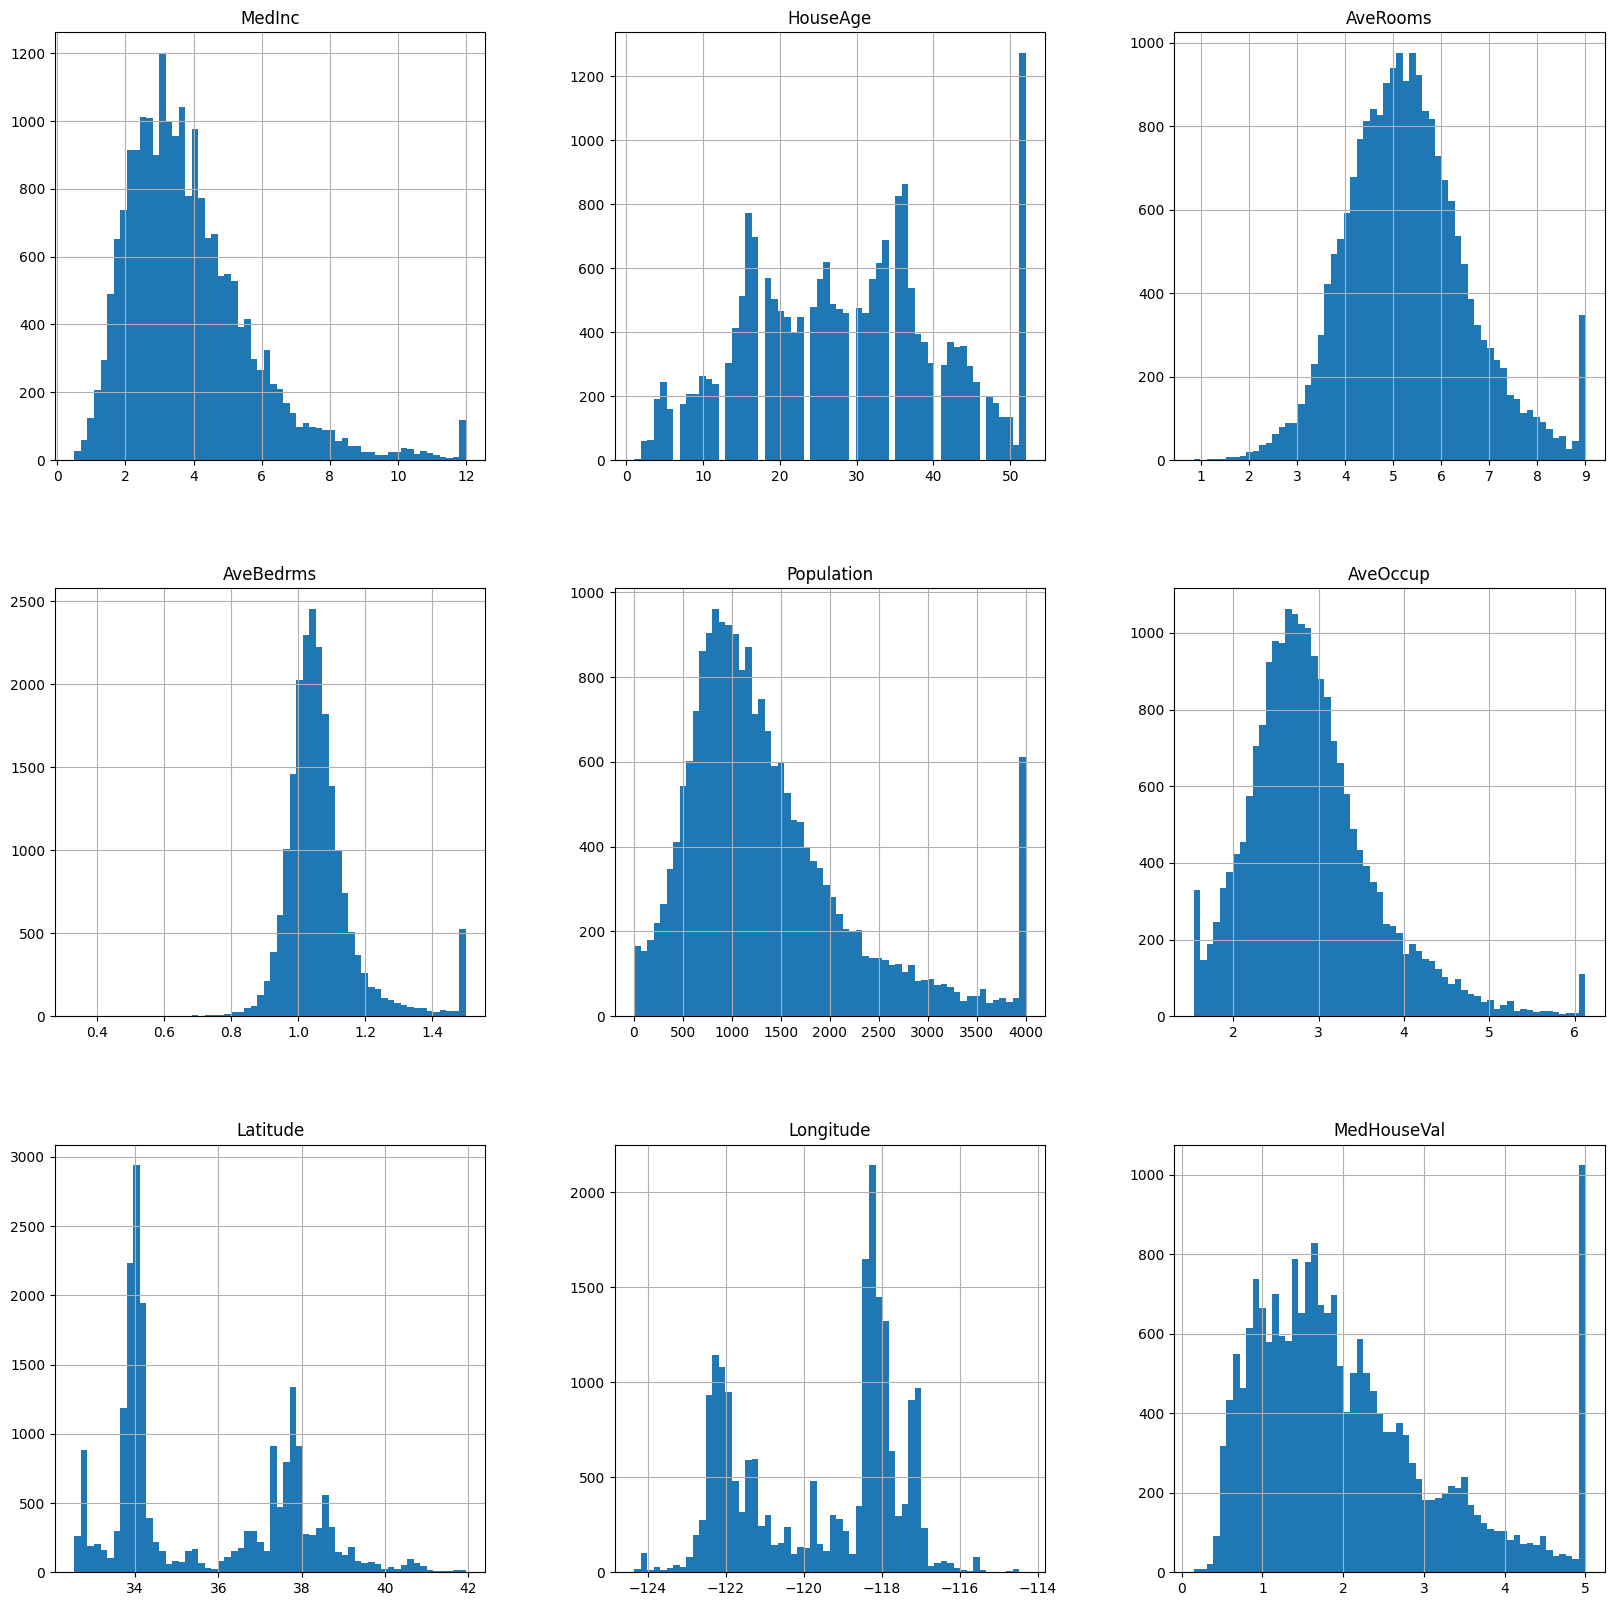

In [5]:
df['MedInc'] = df['MedInc'].clip(upper=12)
df['AveRooms'] = df['AveRooms'].clip(upper=9)
df['AveBedrms'] = df['AveBedrms'].clip(upper=1.5)
df['Population'] = df['Population'].clip(upper=4000)
df['MedHouseVal'] = df['MedHouseVal'].clip(upper=5)

lower = df['AveOccup'].quantile(0.01)
upper = df['AveOccup'].quantile(0.995)  # use 99.5 instead of 99
df['AveOccup'] = df['AveOccup'].clip(lower=lower, upper=upper)
df.hist(bins = 60, figsize=(20,20))


<style>
  .rtl {
    direction: rtl;
    text-align: justify;
    line-height: 200%;
    font-family: "Vazir", sans-serif;
    color: #fff; /* white text */
  }
  .ltr {
    direction: ltr;
    unicode-bidi: isolate;
  }
  h2.rtl {
    color: #4cf7a4ff;
  }
  strong {
    color: #4cf7a4ff; /* light pink highlights */
  }
</style>
<p class = "rtl">
بعد از رسم نمودار متوجه میشویم که ستون <span class = "ltr"> AveOccup</span> هنوز دارای بیشترین مقدار صفر است.
</p>

In [6]:
df=df.drop('AveOccup', axis = 1)

In [7]:
df.to_csv("new_housing.csv", index= False)

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,37.85,-122.25,3.422


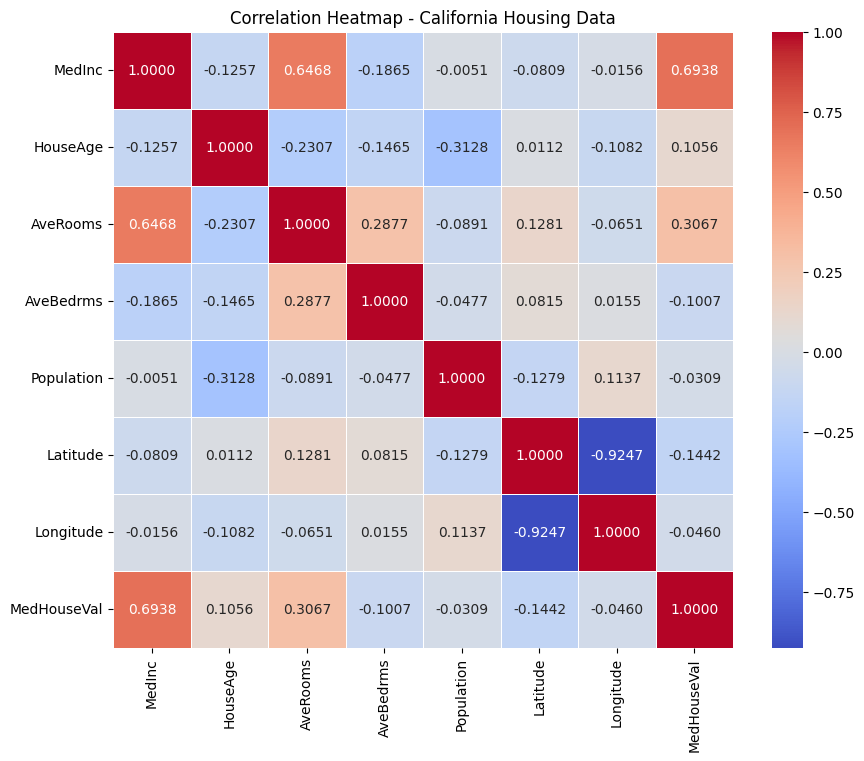

In [16]:
corr = df.corr()

plt.figure(figsize=(10,8))

sns.heatmap(
    corr,
    annot=True,
    fmt=".4f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar=True
)

plt.title("Correlation Heatmap - California Housing Data")
plt.show()

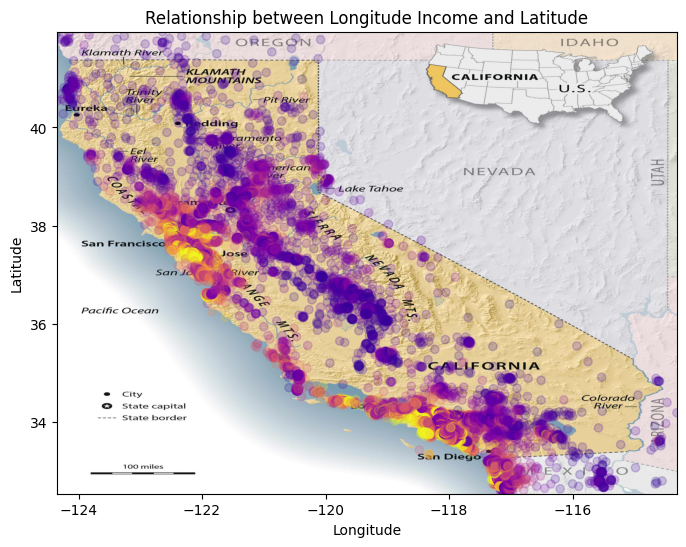

In [10]:
plt.figure(figsize=(8,6))
map = mpimg.imread('map.jpg')
xmin, xmax = df['Longitude'].min(), df['Longitude'].max()
ymin, ymax = df['Latitude'].min(), df['Latitude'].max()

# Plot the map as the background
plt.imshow(map, extent=[xmin,xmax, ymin,ymax], aspect='auto')

plt.scatter(
    df['Longitude'], 
    df['Latitude'], 
    alpha=0.2, 
    cmap='plasma',
    c = df['MedHouseVal']
    )


plt.title('Relationship between Longitude Income and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [11]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.860221,28.639486,5.313977,1.066858,1372.745349,35.631861,-119.569704,2.068558
std,1.847303,12.585558,1.275106,0.111625,860.638198,2.135952,2.003532,1.153955
min,0.499900,1.000000,0.846154,0.333333,3.000000,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,37.710000,-118.010000,2.647250
max,12.000000,52.000000,9.000000,1.500000,4000.000000,41.950000,-114.310000,5.000000


In [ ]:
describe1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


y = df['MedHouseVal']
x = df.drop('MedHouseVal', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# print(df['highvalue'])

In [13]:
from sklearn.linear_model import LinearRegression


model1 = LinearRegression()
model1.fit(x_train_scaled, y_train)
y_pred = model1.predict(x_test_scaled)


In [14]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.6079294234866698
RMSE: 0.7167787679614429


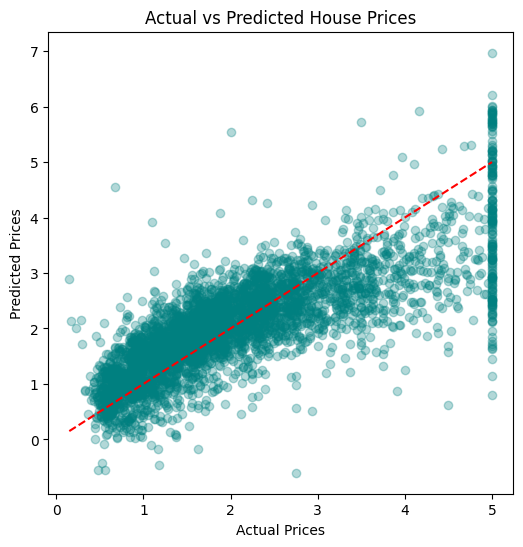

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100, 
    random_state=42,
    n_jobs=1
)

rf.fit(x_train_scaled, y_train)
y_pred2 = rf.predict(x_test_scaled)

In [17]:
r2_new = r2_score(y_test, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))

print("R² Score:", r2_new)
print("RMSE:", rmse2)

R² Score: 0.7985511340734214
RMSE: 0.5137897313655531


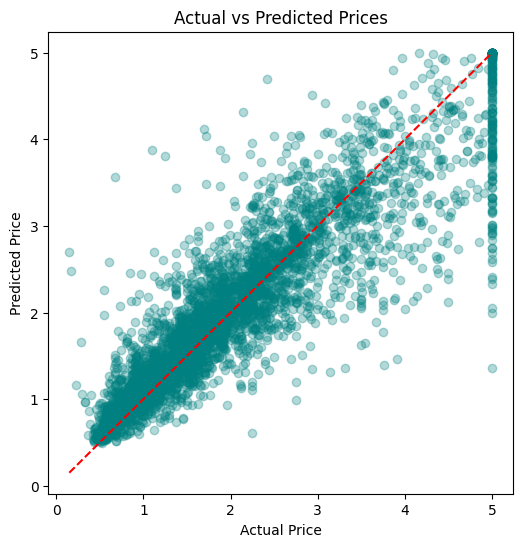

In [18]:
fig2 = plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred2, alpha=0.3, color = 'teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [19]:
from xgboost import XGBRegressor

model  = XGBRegressor(

    n_estimators = 500,
    max_depth = 5,
    learning_rate = 0.05,
    sub_sample = 0.8,
    colsample_bytree=0.8,
    # tree_method="gpu_hist",         # trains on GPU
    # predictor="gpu_predictor",      # infer on GPU (optional; often auto-selected)
    random_state=42
)

In [24]:
model.fit(x_train_scaled, y_train)
y_pred_xgb = model.predict(x_test_scaled)

r1_xgb = r2_score(y_pred_xgb, y_test)
rmse_xgb =  np.sqrt(mean_squared_error(y_pred_xgb, y_test))
print("r2 score:", r1_xgb)
print("rmse score:",  rmse_xgb)

/opt/miniconda3/envs/xgb311/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1758007651359/work/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


r2 score: 0.7737804287123509
rmse score: 0.48546654239103504


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([
    ('model', XGBRegressor(random_state=42))
])

param_grid = {
    'model__n_estimators': [300, 500],
    'model__max_depth': [4, 6, 8],
    'model__learning_rate': [0.01, 0.1],
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train_scaled, y_train)
print("Best params:", grid.best_params_)


Best params: {'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 500}


In [29]:
best_model = grid.best_estimator_
best_params = grid.best_params_
best_cv_score = grid.best_score_

print("best pipline:", best_model)
print("best parameters:", best_params)
print("best CV RMSE:", best_cv_score)

best pipline: Pipeline(steps=[('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None

In [32]:
y_best_model = best_model.predict(x_test_scaled)


r2_best_xgb = r2_score(y_best_model, y_test)
rmse_best =  np.sqrt(mean_squared_error(y_best_model, y_test))
print("r2 score:", r2_best_xgb)
print("rmse score:",  rmse_best)

r2 score: 0.7976695931045292
rmse score: 0.469864010346394


In [33]:
import joblib

joblib.dump(best_model, "best_model.joblib")

['best_model.joblib']